## "Amazing Semantic Segmentation"

In [1]:
%%capture
!pip install tensorflow-gpu
!pip install keras_applications
!pip install keras_preprocessing

In [2]:
import numpy as np
from imageio import imread
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import tensorflow

In [3]:
!git clone https://github.com/dancassin/Amazing-Semantic-Segmentation.git ./ASS/

Cloning into './ASS'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 1939 (delta 8), reused 10 (delta 5), pack-reused 1915
Receiving objects: 100% (1939/1939), 572.47 MiB | 35.77 MiB/s, done.
Resolving deltas: 100% (345/345), done.
Checking out files: 100% (1472/1472), done.


In [4]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 Biggie
'Colab Notebooks'
'Copy of Whiteboard Warriors #21 - Group 1 .gdoc'
 DATA
'Data Science Notes.gdoc'
'Deep Learning with PyTorch Chapter 1+2 notes.gdoc'
'Deep Learning with PyTorch Chapter 3 notes.gdoc'
'GitHub Contributions Quick Guide.gdoc'
'Hadoop Tutorial.gdoc'
'How to Efficiently Learn Your Next Thing.gdoc'
'Job Search'
'Mentor Meeting Agendas.gdoc'
 Modules
'My Drive'
 Networking
'Presenting from a Jupyter Notebook.gdoc'
'R Notes.gdoc'
'Setting up a virtual environment.gdoc'
'Thinkful Data-201 Syllabus.gdoc'
'Untitled spreadsheet.gsheet'
 yolov3


In [5]:
%%capture
!cp /mydrive/Biggie/segnet_initial_train_100.zip ./

!mkdir ./segnet_initial_train_100
!unzip  ./segnet_initial_train_100.zip -d ./segnet_initial_train_100


!cp /mydrive/Biggie/ASS/class_dict.csv ./ASS/dataset/class_dict.csv
# !mv ./segnet_initial_train_100/*1.png ./UNet/data/imgs
# !mv ./segnet_initial_train_100/*gt.png ./UNet/data/masks

In [6]:
cd /content

/content


In [7]:
# the appropriate file set up for the model to see train/val/test
!mkdir ./ASS/dataset
!mkdir ./ASS/dataset/train
!mkdir ./ASS/dataset/train/images
!mkdir ./ASS/dataset/train/labels
!mkdir ./ASS/dataset/valid
!mkdir ./ASS/dataset/valid/images
!mkdir ./ASS/dataset/valid/labels
!mkdir ./ASS/dataset/test
!mkdir ./ASS/dataset/test/images
!mkdir ./ASS/dataset/test/labels

!cp /mydrive/Biggie/ASS/class_dict.csv ./ASS/dataset/

In [8]:
# converting all pictures to RBG and saving as .jpgs to remove 4th dimension from .pngs

# Places 90 images in Train
image_set = sorted(glob('/content/segnet_initial_train_100/*1.png'))
mask_set = sorted(glob('/content/segnet_initial_train_100/*gt.png'))

for i, j in zip(image_set[:-10], mask_set[:-10]):
    image_filename = i.split('/')[-1].split('.')[0]
    mask_filename = j.split('/')[-1].split('.')[0]

    image = Image.open(i)
    mask = Image.open(j)

    image_rgb = image.convert('RGB')
    #mask_rgb = mask.convert('RGB') converting to RGB increased dimensions to 3... duh

    image_rgb.save(f'/content/ASS/dataset/train/images/{image_filename}.jpg')
    mask.save(f'/content/ASS/dataset/train/labels/{mask_filename}.jpg')
    
    image_rgb.save(f'/content/ASS/dataset/valid/images/{image_filename}.jpg')
    mask.save(f'/content/ASS/dataset/valid/labels/{mask_filename}.jpg')


# Places 10 images in validation
for i, j in zip(image_set[-10:], mask_set[-10:]):
    image_filename = i.split('/')[-1].split('.')[0]
    mask_filename = j.split('/')[-1].split('.')[0]

    image = Image.open(i)
    mask = Image.open(j)

    image_rgb = image.convert('RGB')
    #mask_rgb = mask.convert('RGB') converting to RGB increased channels to 3... duh

    image_rgb.save(f'/content/ASS/dataset/test/images/{image_filename}.jpg')
    mask.save(f'/content/ASS/dataset/test/labels/{mask_filename}.jpg')

In [9]:
%cd ./ASS

/content/ASS


In [10]:
# Checking single image shape
from imageio import imread

example_image_train = imread('/content/ASS/dataset/train/images/12061_st1280_119 1.jpg')
example_image_train.shape

(960, 1280, 3)

## Training

In [13]:
!python train.py --model SegNet --base_model VGG16 --dataset ./dataset --num_classes 1 --crop_height 896 --crop_width 1280 --batch_size 1 --num_epochs 1 --initial_epoch 0

2020-10-17 00:28:21.139342: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-17 00:28:22.824162: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-17 00:28:22.844396: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-17 00:28:22.845398: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-10-17 00:28:22.845453: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-17 00:28:22.847498: I tensorflow/stream_executor/pl

In [ ]:
# Save training weights to colab
!mv /content/ASS/weights/* /content/mydrive/Biggie/ASS

## Prediction

In [ ]:
# single image prediction
!python predict.py --model SegNet --base_model VGG16 --num_classes 1 --crop_height 896 --crop_width 1024 --weights ./weights/SegNet_based_on_VGG16.h5 --image_path ./dataset/valid/images/14092_st1280_119\ 1.jpg 

In [ ]:
imread('/content/ASS/predictions/14092_st1280_119 1.jpg').shape


(896, 1024, 3)

Array([ 2,  4,  5,  8, 12, 15, 16, 17, 19, 21, 22, 24, 26, 27, 30, 31],
      dtype=uint8)

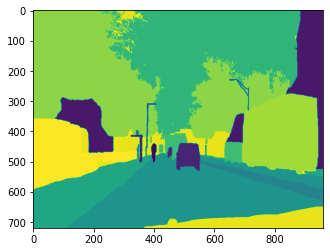

In [ ]:
cam_image_inspect = imread('./CamVid/test/labels/0001TP_007170_L.png')

plt.imshow(cam_image_inspect)
np.unique(cam_image_inspect)

## Converting Caffe Weights to .h5

In [ ]:
%cd /content/

/content


In [ ]:
!git clone https://github.com/pierluigiferrari/caffe_weight_converter.git

Cloning into 'caffe_weight_converter'...
remote: Enumerating objects: 63, done.
remote: Total 63 (delta 0), reused 0 (delta 0), pack-reused 63
Unpacking objects: 100% (63/63), done.


In [ ]:
!wget http://mi.eng.cam.ac.uk/~agk34/resources/SegNet/segnet_weights_driving_webdemo.caffemodel /content/

--2020-10-16 23:46:26--  http://mi.eng.cam.ac.uk/~agk34/resources/SegNet/segnet_weights_driving_webdemo.caffemodel
Resolving mi.eng.cam.ac.uk (mi.eng.cam.ac.uk)... 129.169.82.147
Connecting to mi.eng.cam.ac.uk (mi.eng.cam.ac.uk)|129.169.82.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117809921 (112M) [text/plain]
Saving to: ‘segnet_weights_driving_webdemo.caffemodel’

segnet_weights_driv 100%[===================>] 112.35M  19.0MB/s    in 8.5s    

2020-10-16 23:46:35 (13.2 MB/s) - ‘segnet_weights_driving_webdemo.caffemodel’ saved [117809921/117809921]

/content/: Scheme missing.
FINISHED --2020-10-16 23:46:35--
Total wall clock time: 9.1s
Downloaded: 1 files, 112M in 8.5s (13.2 MB/s)


In [ ]:
!wget https://github.com/alexgkendall/SegNet-Tutorial/blob/master/Example_Models/segnet_model_driving_webdemo.prototxt /content/

--2020-10-16 23:46:35--  https://github.com/alexgkendall/SegNet-Tutorial/blob/master/Example_Models/segnet_model_driving_webdemo.prototxt
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘segnet_model_driving_webdemo.prototxt’

segnet_model_drivin     [ <=>                ] 393.58K  --.-KB/s    in 0.04s   

2020-10-16 23:46:35 (10.5 MB/s) - ‘segnet_model_driving_webdemo.prototxt’ saved [403022]

/content/: Scheme missing.
FINISHED --2020-10-16 23:46:35--
Total wall clock time: 0.5s
Downloaded: 1 files, 394K in 0.04s (10.5 MB/s)


In [ ]:
%%capture
!sudo apt install caffe-cpu


In [ ]:
!python ./caffe_weight_converter/caffe_weight_converter.py '/mydrive/Biggie/ASS/initial_weights_caffe.h5' '/content/segnet_model_driving_webdemo.prototxt' '/content/segnet_weights_driving_webdemo.caffemodel' --verbose

[libprotobuf ERROR google/protobuf/text_format.cc:298] Error parsing text-format caffe.NetParameter: 6:1: Expected identifier, got: <
F1016 23:47:51.404515  1355 upgrade_proto.cpp:88] Check failed: ReadProtoFromTextFile(param_file, param) Failed to parse NetParameter file: /content/segnet_model_driving_webdemo.prototxt
*** Check failure stack trace: ***


Due to a lack of maintenance by many of these caffe converters, turning it into a .h5 may be difficult